In [3]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [4]:
#input Data 
df=pd.read_spss("C:/Users/USER/OneDrive/Desktop/Mamun Sir Project/Age at Early Marrige/Age at early Marriage.sav")

In [5]:
#overview of the data 
df.head()

,Respondent_current_age,Division,Types_of_place_of_residence,Highest_educational_level,Religion,Literacy,Husband_desire_for_children,Exposure,Husband_education_level,Respondent_currently_working,Weath_index_combined,Age_at_first_birth,Current_contraceptive_method,Ideal_number_of_children,Husband_age,Age_at_first_marriage,Occupation_of_husband
0,46-49,Barisal,Urban,Secondary,Islam,can not read at all,Husband wants fewer,Fecund,Primary,No,Middle,12-20,Traditional Method,2 or less,17-30,Early marriage,Proffesional
1,46-49,Sylhet,Rural,No education,Islam,can not read at all,Don't know,Fecund,Primary,No,Richer,12-20,No Method,2 or less,31-50,Early marriage,Did not work
2,46-49,Sylhet,Rural,Primary,Islam,can not read at all,Husband wants fewer,Fecund,Primary,No,Richer,12-20,Traditional Method,3 or more,31-50,Late marriage,Did not work
3,46-49,Barisal,Rural,Higher,Islam,can not read at all,Both want same,Fecund,Higher,No,Richest,12-20,Traditional Method,2 or less,31-50,Early marriage,Did not work
4,46-49,Rajshahi,Urban,No education,Islam,can not read at all,Both want same,Fecund,No education,Yes,Richer,12-20,No Method,2 or less,31-50,Early marriage,Did not work


In [6]:
#df_csv=pd.read_csv("C:/Users/USER/OneDrive/Desktop/Mamun Sir Project/Age at Early Marrige/Age at early Marriage.csv")

In [7]:
#df_csv.head()

In [8]:
# df_csv is an object of pandas's class and the isnull , Sum is the method under the class 
df.isnull().sum()

Respondent_current_age          0
Division                        0
Types_of_place_of_residence     0
Highest_educational_level       0
Religion                        0
Literacy                        0
Husband_desire_for_children     0
Exposure                        0
Husband_education_level         0
Respondent_currently_working    0
Weath_index_combined            0
Age_at_first_birth              0
Current_contraceptive_method    0
Ideal_number_of_children        0
Husband_age                     0
Age_at_first_marriage           0
Occupation_of_husband           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15943 entries, 0 to 15942
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Respondent_current_age        15943 non-null  category
 1   Division                      15943 non-null  category
 2   Types_of_place_of_residence   15943 non-null  category
 3   Highest_educational_level     15943 non-null  category
 4   Religion                      15943 non-null  category
 5   Literacy                      15943 non-null  category
 6   Husband_desire_for_children   15943 non-null  category
 7   Exposure                      15943 non-null  category
 8   Husband_education_level       15943 non-null  category
 9   Respondent_currently_working  15943 non-null  category
 10  Weath_index_combined          15943 non-null  category
 11  Age_at_first_birth            15943 non-null  category
 12  Current_contraceptive_method  15943 non-null  

In [10]:
for i in df.columns:
    print(df[i].unique())

['46-49', '41-45', '36-40', '31-35', '26-30', '21-25', '15-20']
Categories (7, object): ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-49']
['Barisal', 'Sylhet', 'Rajshahi', 'Dhaka', 'Mymensingh', 'Chittagong', 'Rangpur', 'Khulna']
Categories (8, object): ['Barisal', 'Chittagong', 'Dhaka', 'Khulna', 'Mymensingh', 'Rajshahi', 'Rangpur', 'Sylhet']
['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']
['Secondary', 'No education', 'Primary', 'Higher']
Categories (4, object): ['Higher', 'No education', 'Primary', 'Secondary']
['Islam', 'Hinduism', 'Buddhism', 'Christianity']
Categories (4, object): ['Buddhism', 'Christianity', 'Hinduism', 'Islam']
['can not read at all', 'Able to read only parts of sentence', 'Able to read Whole sentence']
Categories (3, object): ['Able to read Whole sentence', 'Able to read only parts of sentence', 'can not read at all']
['Husband wants fewer', 'Don't know', 'Both want same', 'Husband wants more']
Categories (4, object): ['Both want sa

In [11]:
df.Respondent_current_age.unique()

['46-49', '41-45', '36-40', '31-35', '26-30', '21-25', '15-20']
Categories (7, object): ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-49']

In [12]:
#Check the duplicates
df.duplicated().sum()

1251

In [13]:
#Dropping the duplicates
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 0 to 15941
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Respondent_current_age        14692 non-null  category
 1   Division                      14692 non-null  category
 2   Types_of_place_of_residence   14692 non-null  category
 3   Highest_educational_level     14692 non-null  category
 4   Religion                      14692 non-null  category
 5   Literacy                      14692 non-null  category
 6   Husband_desire_for_children   14692 non-null  category
 7   Exposure                      14692 non-null  category
 8   Husband_education_level       14692 non-null  category
 9   Respondent_currently_working  14692 non-null  category
 10  Weath_index_combined          14692 non-null  category
 11  Age_at_first_birth            14692 non-null  category
 12  Current_contraceptive_method  14692 non-null  

# Feature Engineering

# Encoding

In [15]:
pd.DataFrame(df.columns)

,0
0,Respondent_current_age
1,Division
2,Types_of_place_of_residence
3,Highest_educational_level
4,Religion
5,Literacy
6,Husband_desire_for_children
7,Exposure
8,Husband_education_level
9,Respondent_currently_working


In [16]:
for i in df.columns:
   a=df[i].nunique()
   print(i,    a)

Respondent_current_age 7
Division 8
Types_of_place_of_residence 2
Highest_educational_level 4
Religion 4
Literacy 3
Husband_desire_for_children 4
Exposure 4
Husband_education_level 5
Respondent_currently_working 2
Weath_index_combined 5
Age_at_first_birth 3
Current_contraceptive_method 3
Ideal_number_of_children 2
Husband_age 3
Age_at_first_marriage 2
Occupation_of_husband 2


Ordinal Encoding : 11 columns

Highest_educational_level, 
Literacy, 
Husband_education_level, 
Respondent_currently_working, 
Weath_index_combined, 
Occupation_of_husband , 
Ideal_number_of_children , 
Occupation_of_husband,
Husband_age,
Respondent_current_age



One hot encoding : 6 columns

Division ,

Types_of_place_of_residence  ,
Religion ,  

Husband_desire_for_children , 

Exposure  , 

Current_contraceptive_method , 


Label Encoding: 1 column

Age_at_first_marriage

# Ordinal Encoding

In [17]:
# Separate features and target
X= df.drop('Age_at_first_marriage', axis=1)
y = df['Age_at_first_birth']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
df.Occupation_of_husband.unique()

['Proffesional', 'Did not work']
Categories (2, object): ['Did not work', 'Proffesional']

In [19]:
# Ordinalencoding ->
oe = OrdinalEncoder(categories=[['No education','Primary','Secondary','Higher'],['can not read at all', 'Able to read only parts of sentence', 'Able to read Whole sentence'],[ 'Don\'t know','No education','Primary','Secondary','Higher'],['No', 'Yes'],[ 'Poorer', 'Poorest','Middle', 'Richer', 'Richest',],['2 or less', '3 or more'],['Proffesional', 'Did not work'],['17-30', '31-50', 'more than 50'],['46-49', '41-45', '36-40', '31-35', '26-30', '21-25', '15-20']]).set_output(transform='pandas')
X_train_cough = oe.fit_transform(X_train[['Highest_educational_level','Literacy','Husband_education_level','Respondent_currently_working','Weath_index_combined','Ideal_number_of_children','Occupation_of_husband','Husband_age','Respondent_current_age']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['Highest_educational_level','Literacy','Husband_education_level','Respondent_currently_working','Weath_index_combined','Ideal_number_of_children','Occupation_of_husband','Husband_age','Respondent_current_age']])

X_train_cough

,Highest_educational_level,Literacy,Husband_education_level,Respondent_currently_working,Weath_index_combined,Ideal_number_of_children,Occupation_of_husband,Husband_age,Respondent_current_age
11459,1.0,2.0,2.0,0.0,3.0,0.0,0.0,1.0,5.0
13156,2.0,2.0,4.0,1.0,2.0,0.0,0.0,2.0,5.0
771,2.0,0.0,2.0,1.0,4.0,0.0,0.0,1.0,0.0
8249,1.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,4.0
3828,2.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
5525,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0
14571,2.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,6.0
5726,2.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,3.0
901,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# One hot encoding

In [20]:
# OneHotEncoding -> Division ,  Types_of_place_of_residence  ,Religion ,  Husband_desire_for_children ,  Exposure  , Current_contraceptive_method ,

ohe = OneHotEncoder(drop='first',sparse_output=False).set_output(transform='pandas')
X_train_gender_city = ohe.fit_transform(X_train[['Division','Types_of_place_of_residence','Religion','Husband_desire_for_children','Exposure','Current_contraceptive_method']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['Division','Types_of_place_of_residence','Religion','Husband_desire_for_children','Exposure','Current_contraceptive_method']])

X_train_gender_city

,Division_Chittagong,Division_Dhaka,Division_Khulna,Division_Mymensingh,Division_Rajshahi,Division_Rangpur,Division_Sylhet,Types_of_place_of_residence_Urban,Religion_Christianity,Religion_Hinduism,Religion_Islam,Husband_desire_for_children_Don't know,Husband_desire_for_children_Husband wants fewer,Husband_desire_for_children_Husband wants more,"Exposure_Infecund, menopausal",Exposure_Postpartum amenorrheic,Exposure_Pregnant,Current_contraceptive_method_No Method,Current_contraceptive_method_Traditional Method
11459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
771,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3828,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14571,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
901,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Label encoding

In [21]:
# 0-Early 
# 1-Late

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
le.classes_

array(['12-20', '21-30', '31-41'], dtype=object)

In [22]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

# Concate the Columns 

In [23]:
x_train=pd.concat([X_train_cough,X_train_gender_city],axis=1)
x_test=pd.concat([X_test_cough,X_test_gender_city],axis=1)

# Making DataFrame

In [24]:
total_X=pd.concat([x_train,x_test])
total_y=pd.concat([y_train,y_test])
total_y.rename(columns = {0:'Age_at_first_birth'}, inplace = True) 

In [25]:
total_y.info()
total_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 0 to 2938
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age_at_first_birth  14692 non-null  int32
dtypes: int32(1)
memory usage: 172.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 11459 to 11451
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Highest_educational_level                        14692 non-null  float64
 1   Literacy                                         14692 non-null  float64
 2   Husband_education_level                          14692 non-null  float64
 3   Respondent_currently_working                     14692 non-null  float64
 4   Weath_index_combined                             14692 non-null  float64
 5   Ideal_number_of_children                        

In [26]:
total_y.value_counts()

Age_at_first_birth
0                     11752
1                      2842
2                        98
dtype: int64

# Oversampling 

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_before_oversampled_train, X_before_oversampled_test, y_before_oversampled_train, y_before_oversampled_test = train_test_split(total_X,total_y, test_size=0.3, random_state=0)

In [28]:
X_before_oversampled_test

,Highest_educational_level,Literacy,Husband_education_level,Respondent_currently_working,Weath_index_combined,Ideal_number_of_children,Occupation_of_husband,Husband_age,Respondent_current_age,Division_Chittagong,...,Religion_Hinduism,Religion_Islam,Husband_desire_for_children_Don't know,Husband_desire_for_children_Husband wants fewer,Husband_desire_for_children_Husband wants more,"Exposure_Infecund, menopausal",Exposure_Postpartum amenorrheic,Exposure_Pregnant,Current_contraceptive_method_No Method,Current_contraceptive_method_Traditional Method
1892,2.0,0.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14054,1.0,2.0,2.0,0.0,4.0,0.0,0.0,1.0,6.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12143,1.0,2.0,3.0,0.0,4.0,0.0,0.0,1.0,5.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4592,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12660,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11061,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,5.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
12782,1.0,2.0,1.0,1.0,1.0,0.0,0.0,2.0,5.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10364,2.0,2.0,2.0,0.0,4.0,0.0,0.0,1.0,4.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
X_before_oversampled_train

,Highest_educational_level,Literacy,Husband_education_level,Respondent_currently_working,Weath_index_combined,Ideal_number_of_children,Occupation_of_husband,Husband_age,Respondent_current_age,Division_Chittagong,...,Religion_Hinduism,Religion_Islam,Husband_desire_for_children_Don't know,Husband_desire_for_children_Husband wants fewer,Husband_desire_for_children_Husband wants more,"Exposure_Infecund, menopausal",Exposure_Postpartum amenorrheic,Exposure_Pregnant,Current_contraceptive_method_No Method,Current_contraceptive_method_Traditional Method
3594,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2797,1.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9061,2.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
486,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3457,2.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10767,0.0,2.0,3.0,1.0,3.0,0.0,0.0,2.0,4.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1899,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8183,2.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11804,3.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,5.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
import imblearn.over_sampling as sm

# Assuming your data is already preprocessed
X_train = X_before_oversampled_train.astype('int')
y_train = y_before_oversampled_train

# Create an SMOTE instance with a random seed for reproducibility
smo = sm.SMOTE(random_state=2)

# Oversample the data using SMOTE
X_train_oversampled, y_train_oversampled=smo.fit_resample(X_train, y_train)

In [31]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_oversampled.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_oversampled.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(np.sum(y_train_oversampled == 1))) 
print("After OverSampling, counts of label '0': {}".format(np.sum(y_train_oversampled == 1))) 

After OverSampling, the shape of train_X: (24663, 28)
After OverSampling, the shape of train_y: (24663, 1) 

After OverSampling, counts of label '1': Age_at_first_birth    8221
dtype: int64
After OverSampling, counts of label '0': Age_at_first_birth    8221
dtype: int64


# Multicolinearity

In [32]:
X_Feature_Selection=total_X
y_Feature_Selection=total_y
y_Feature_Selection.rename(columns = {0:'Age at Early Marrige'}, inplace = True) 

In [33]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train_Feature_Selection, X_test_Feature_Selection, y_train_Feature_Selection, y_test_Feature_Selection = train_test_split(X_Feature_Selection, y_Feature_Selection, test_size=0.3, random_state=0)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

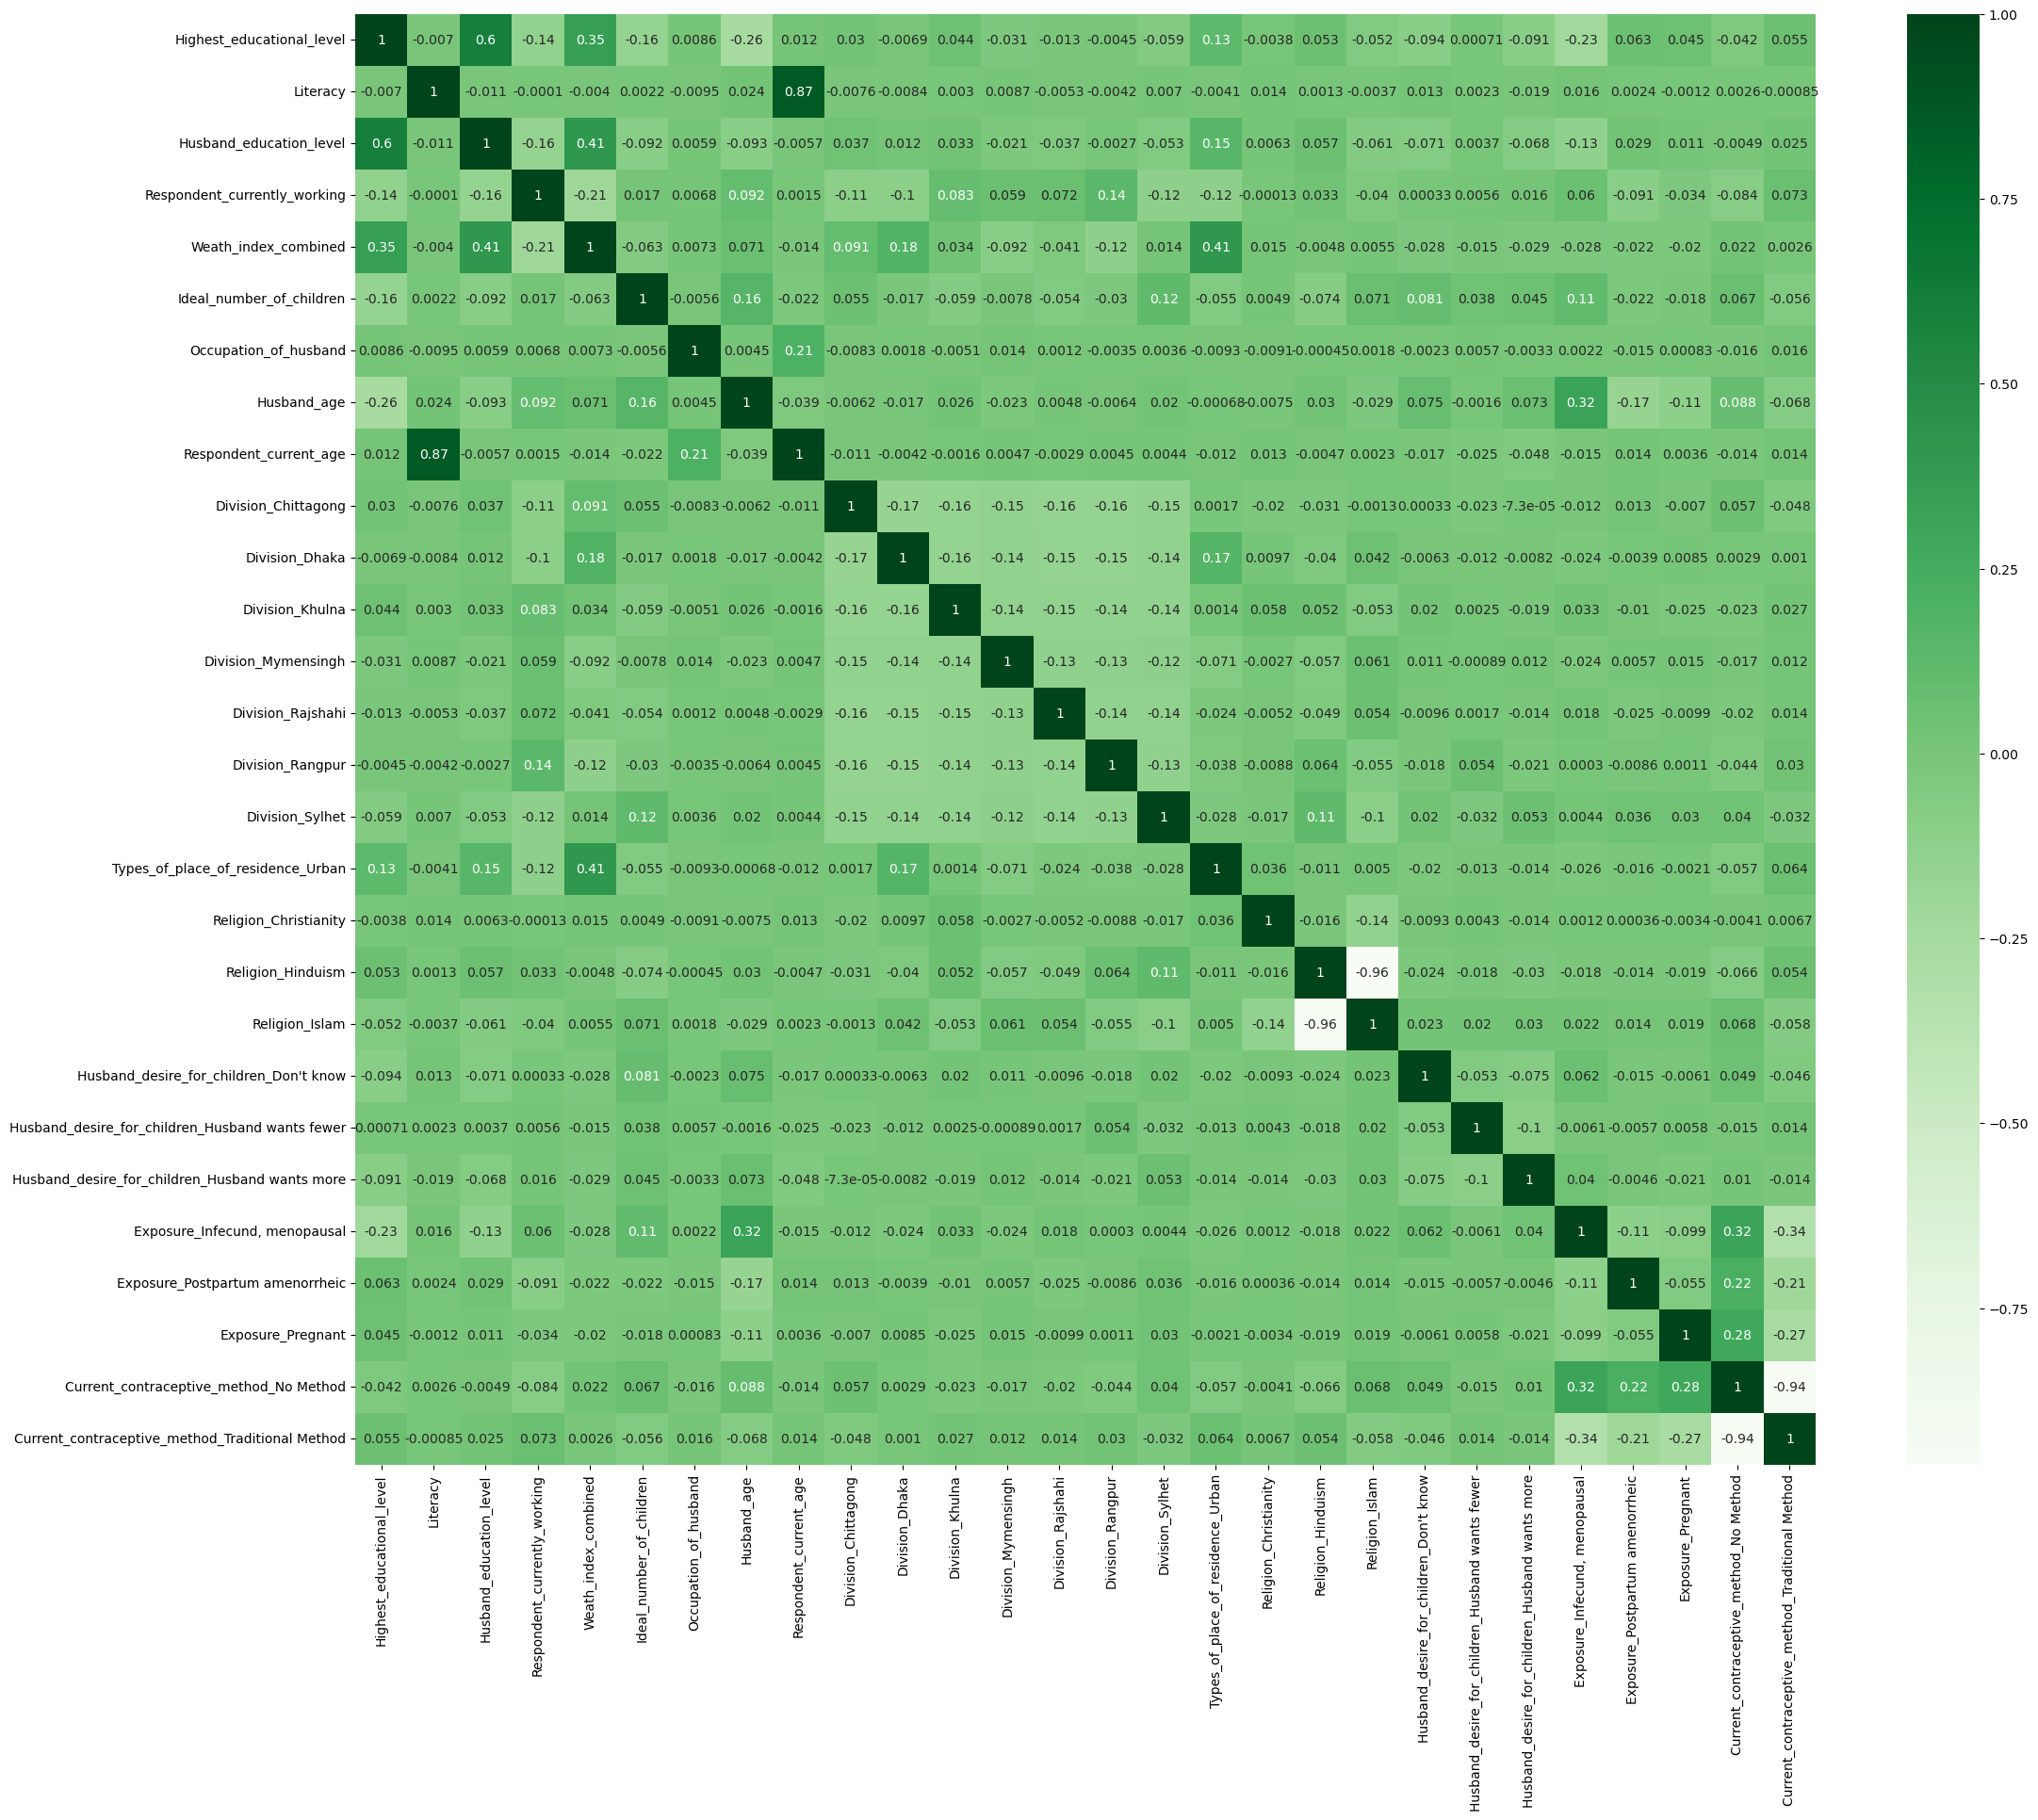

In [34]:
#Multicolinearity Test 
plt.figure(figsize=(25,20))
sns.heatmap(X_Feature_Selection.corr(),cmap="Greens", annot=True)
sns.color_palette("Paired")

# Lasso Feature selection 

In [35]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=30,shuffle=True, random_state=1)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X_train_Feature_Selection,y_train_Feature_Selection)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


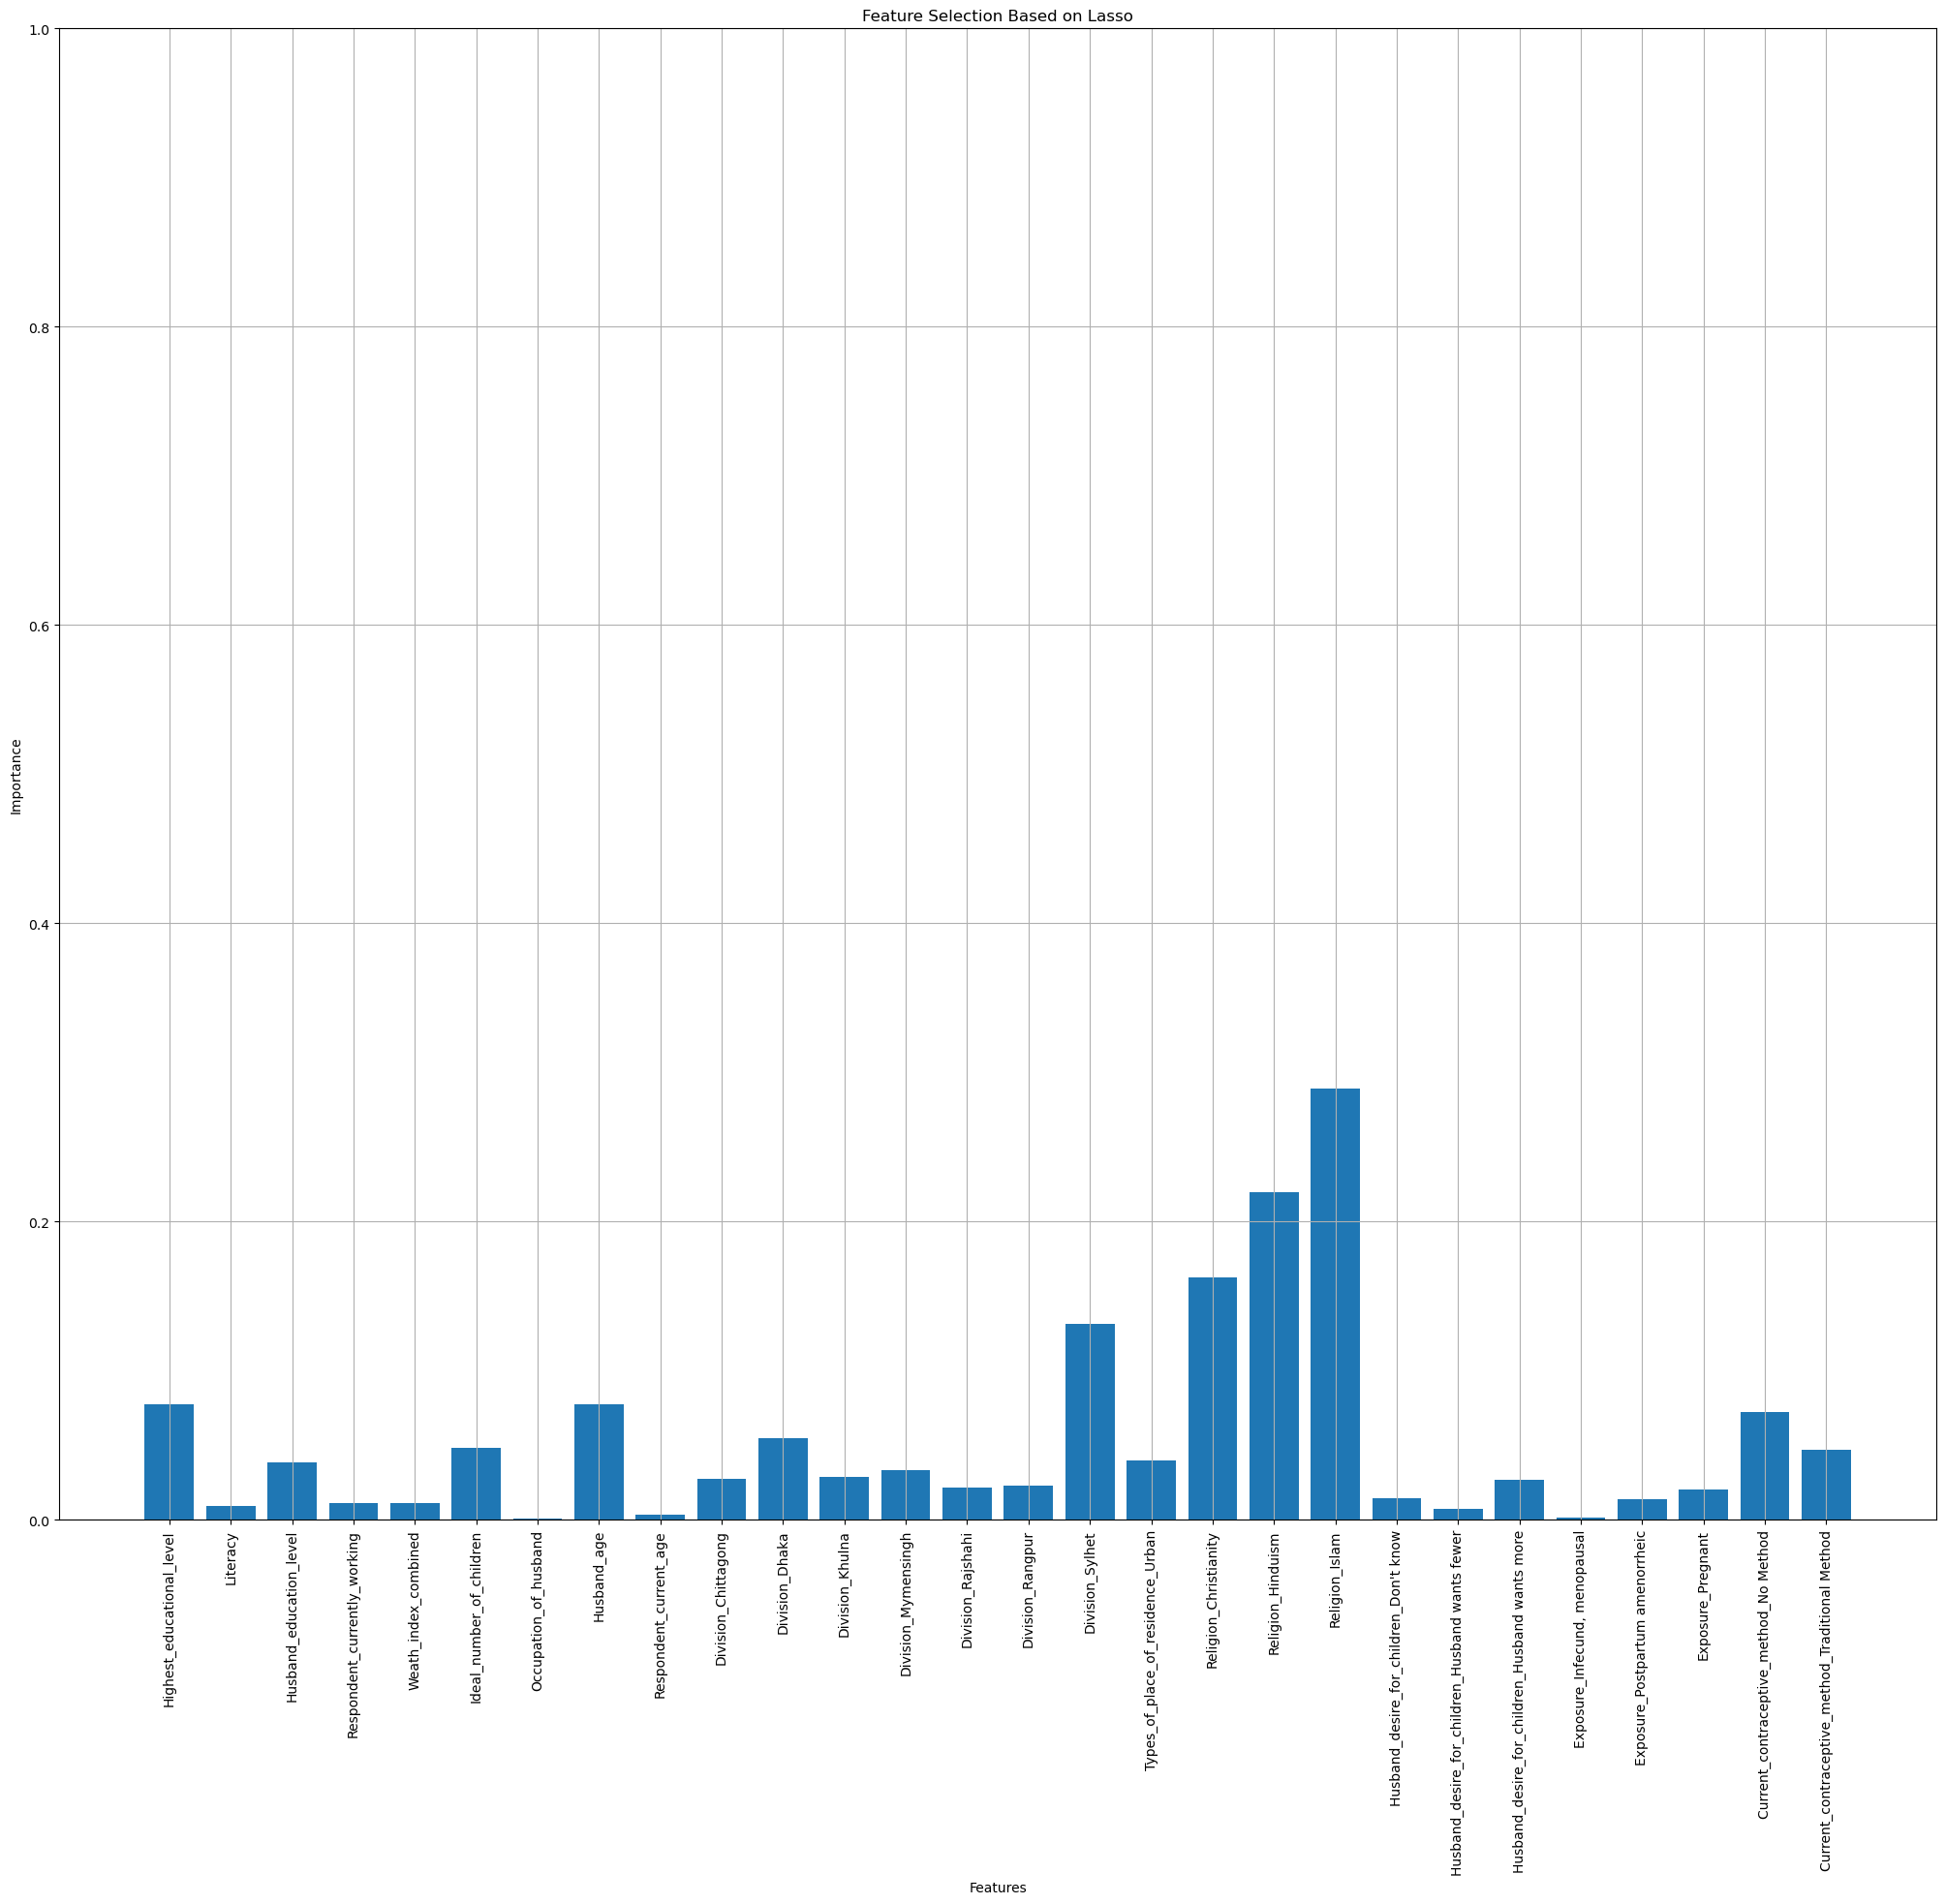

In [36]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train_Feature_Selection, y_train_Feature_Selection)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
names=X_train_Feature_Selection.columns
plt.figure(figsize=(25,20))
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0,1)
plt.show()

In [37]:
a = pd.DataFrame(data = lasso1_coef,index = names,columns=['Lasso Coefficient Values']) 
Lasso_feature_values=a.sort_values(by='Lasso Coefficient Values',ascending=False)
Lasso_feature_values

,Lasso Coefficient Values
Religion_Islam,0.288894
Religion_Hinduism,0.219569
Religion_Christianity,0.162460
Division_Sylhet,0.131414
Highest_educational_level,0.077502
Husband_age,0.077188
Current_contraceptive_method_No Method,0.072304
Division_Dhaka,0.054742
Ideal_number_of_children,0.048338
Current_contraceptive_method_Traditional Method,0.046998


In [38]:
Lasso_features=Lasso_feature_values[Lasso_feature_values.values>0.010475]
Lasso_features_columns=Lasso_features.index
Lasso_features_columns

Index(['Religion_Islam', 'Religion_Hinduism', 'Religion_Christianity',
       'Division_Sylhet', 'Highest_educational_level', 'Husband_age',
       'Current_contraceptive_method_No Method', 'Division_Dhaka',
       'Ideal_number_of_children',
       'Current_contraceptive_method_Traditional Method',
       'Types_of_place_of_residence_Urban', 'Husband_education_level',
       'Division_Mymensingh', 'Division_Khulna', 'Division_Chittagong',
       'Husband_desire_for_children_Husband wants more', 'Division_Rangpur',
       'Division_Rajshahi', 'Exposure_Pregnant',
       'Husband_desire_for_children_Don't know',
       'Exposure_Postpartum amenorrheic', 'Weath_index_combined',
       'Respondent_currently_working'],
      dtype='object')

# CHI square values 

# Accepted Till Division_Rangpur(included) based on P value 0.05

In [39]:
chi_scores = chi2(X_train_Feature_Selection, y_train_Feature_Selection)
chi_scores=np.array(chi_scores)

<Axes: >

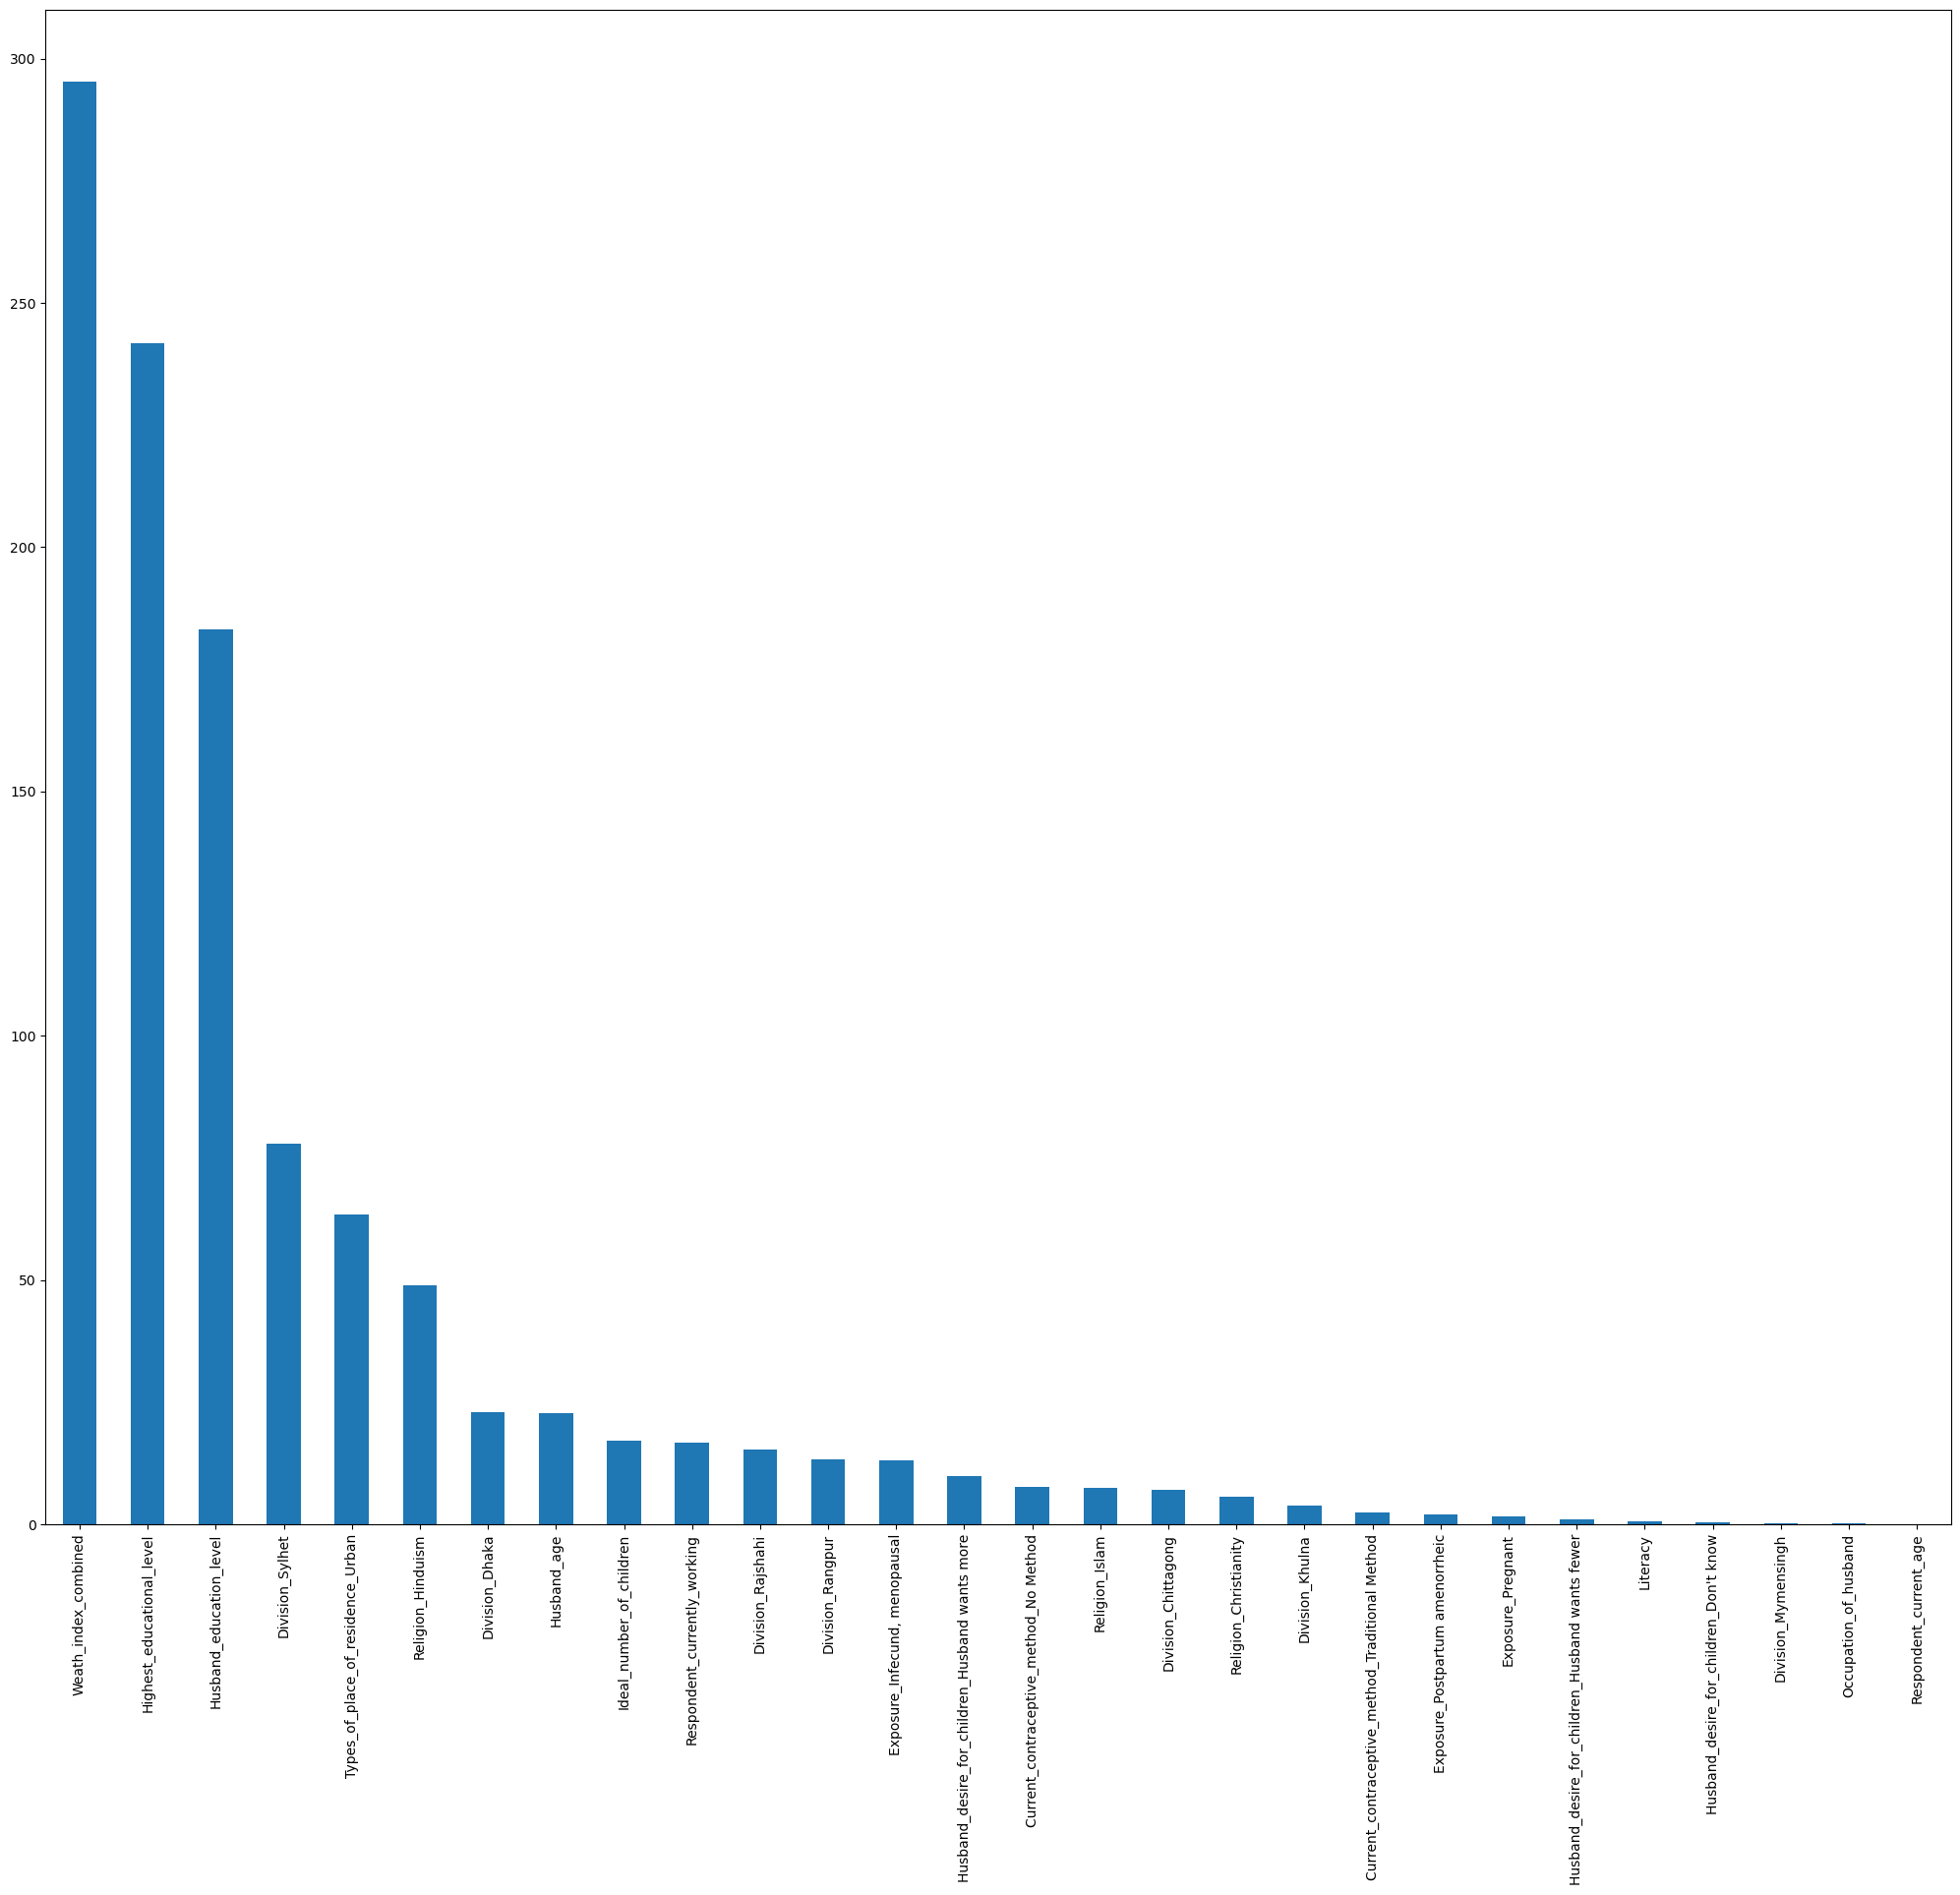

In [40]:
#High value means High importance
plt.figure(figsize=(25,20))
chi_values = pd.Series(chi_scores[0], index=X_train_Feature_Selection.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

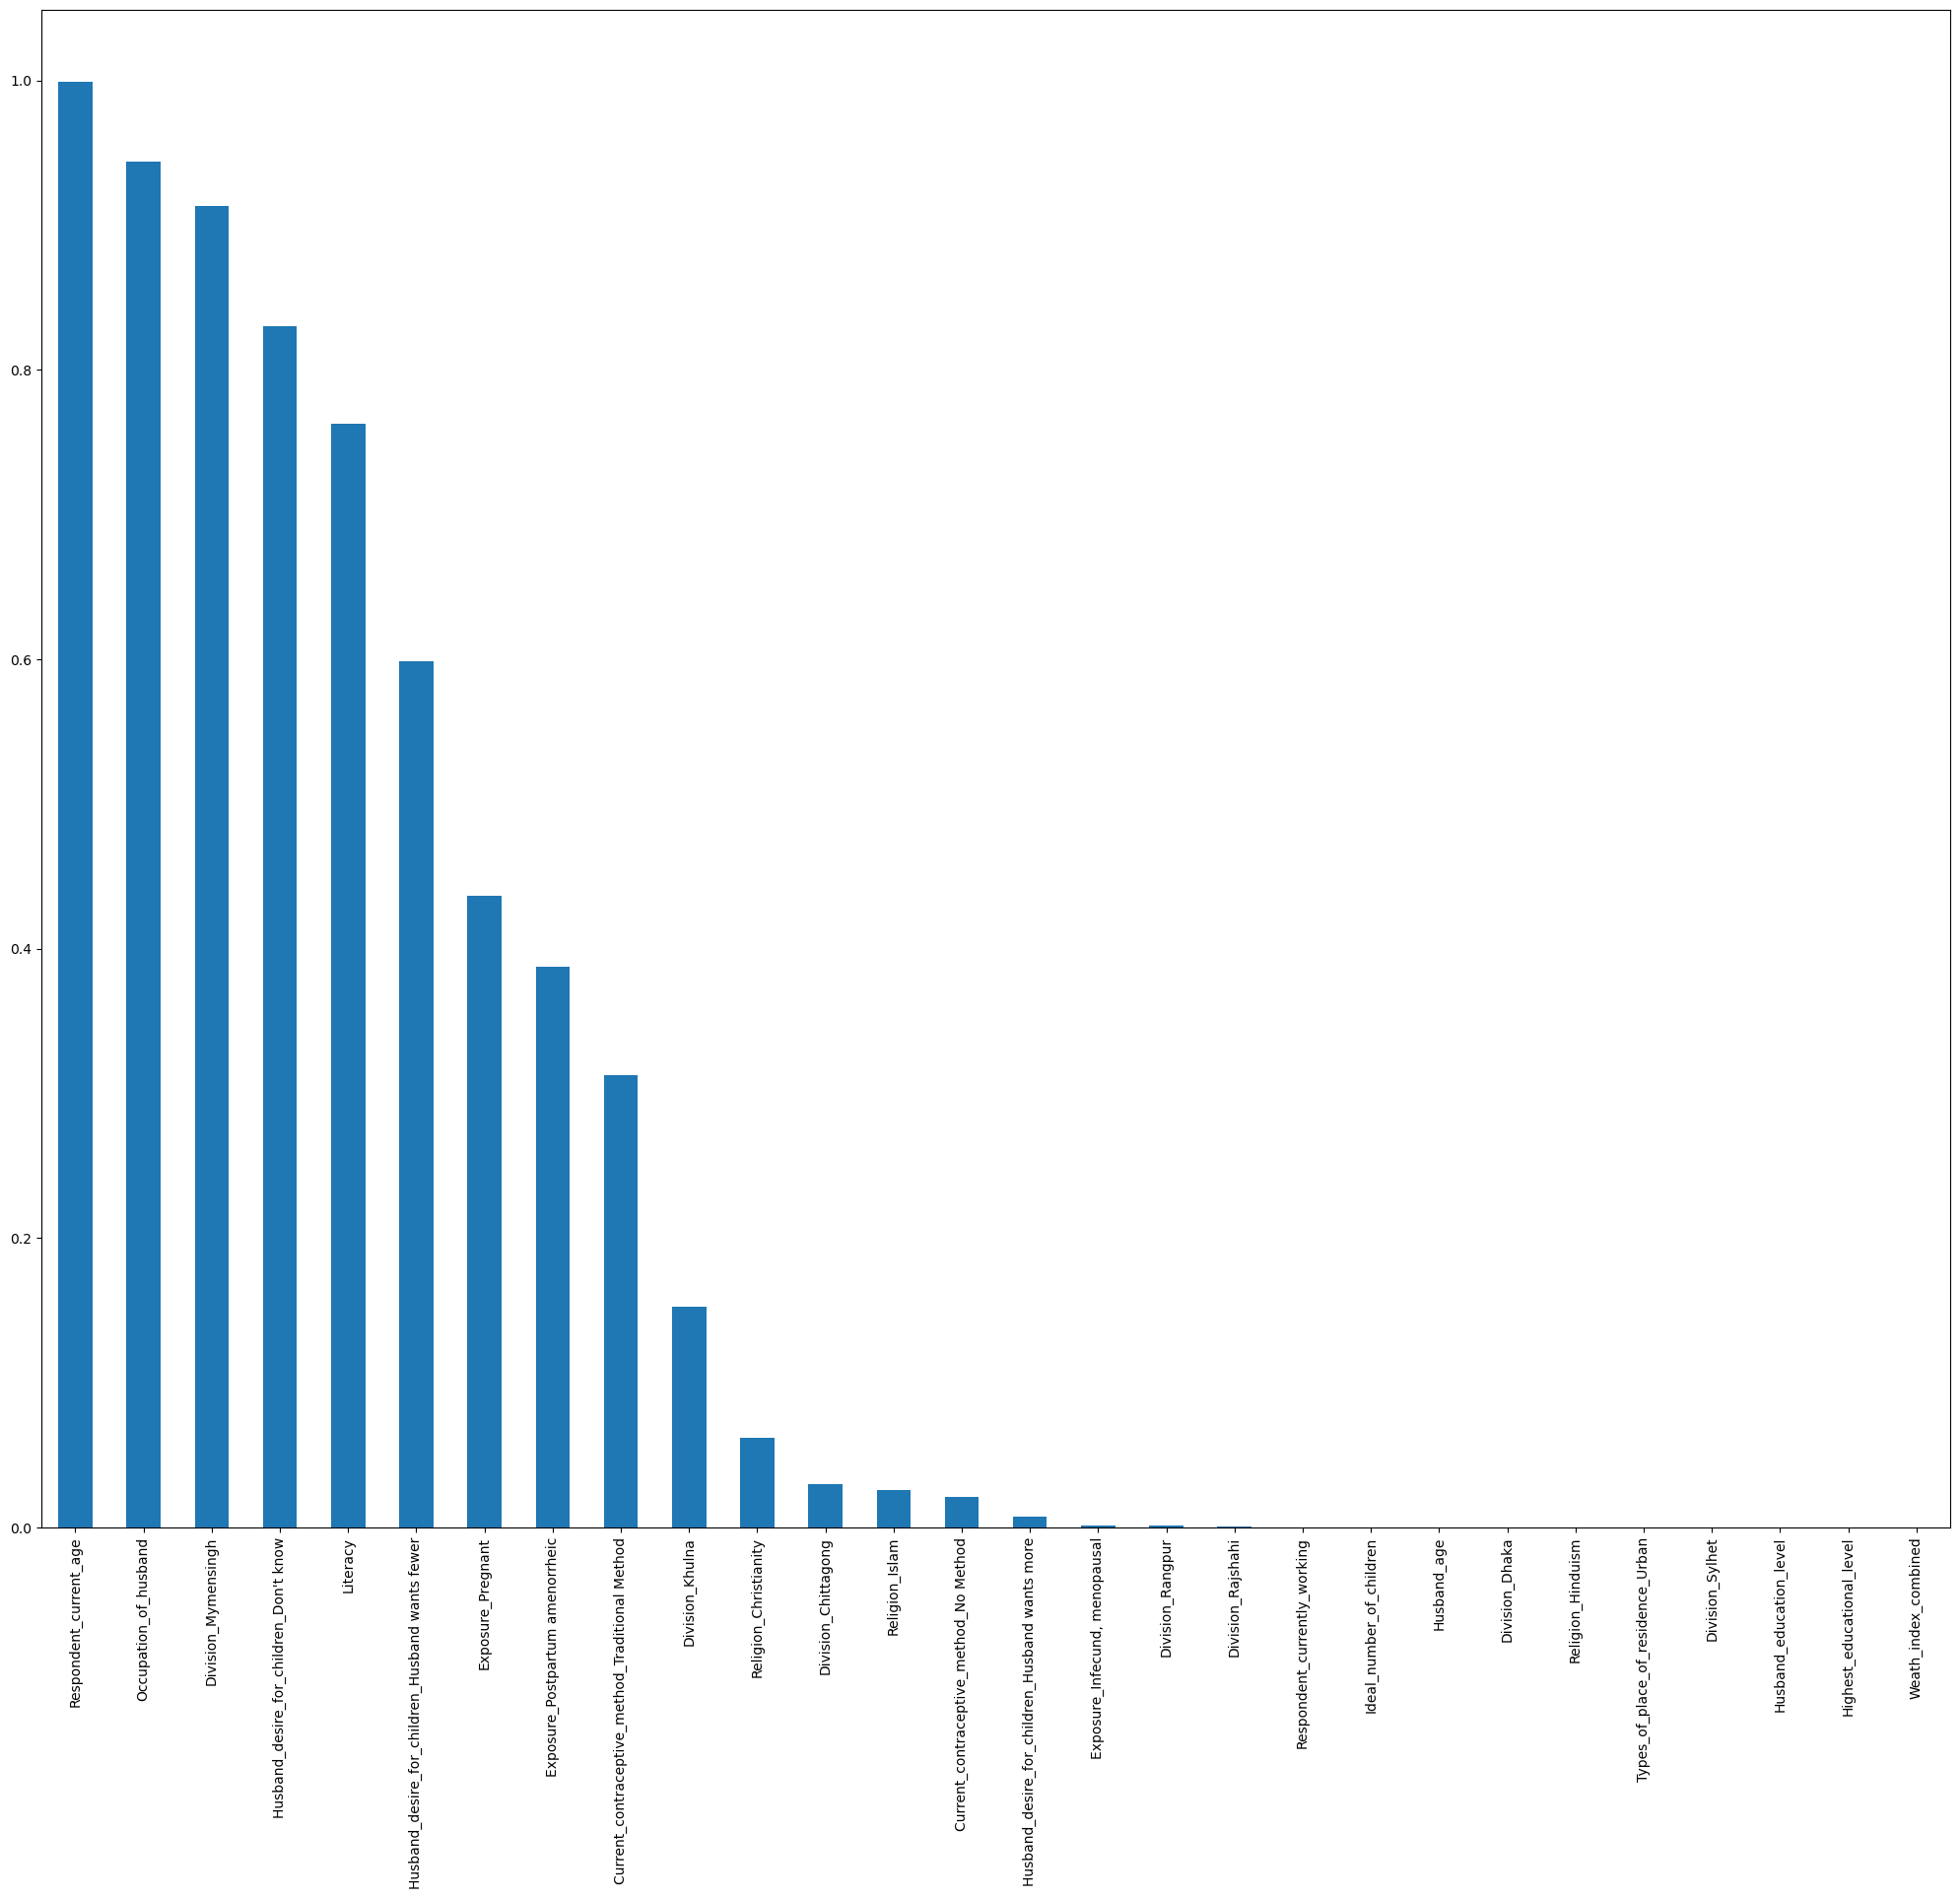

In [41]:
# if p-value > 0.5, lower the importance
plt.figure(figsize=(25,20))
p_values = pd.Series(chi_scores[1], index=X_train_Feature_Selection.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [42]:
#Hightes value selected features
from sklearn.feature_selection import chi2
b = pd.DataFrame(data = chi_scores[0],index = names,columns=['Chi square values']) 
b.sort_values(by='Chi square values',ascending=False)

,Chi square values
Weath_index_combined,295.257176
Highest_educational_level,241.769170
Husband_education_level,183.251859
Division_Sylhet,77.816736
Types_of_place_of_residence_Urban,63.422009
Religion_Hinduism,48.895286
Division_Dhaka,22.933177
Husband_age,22.714060
Ideal_number_of_children,16.995511
Respondent_currently_working,16.779958


In [43]:
c = pd.DataFrame(data = chi_scores[1],index = names,columns=['Chi square p values values']) 
c.sort_values(by='Chi square p values values',ascending=True)
c
chi_square_feature_names=c.index[0:15]
c.index[0:15]

Index(['Highest_educational_level', 'Literacy', 'Husband_education_level',
       'Respondent_currently_working', 'Weath_index_combined',
       'Ideal_number_of_children', 'Occupation_of_husband', 'Husband_age',
       'Respondent_current_age', 'Division_Chittagong', 'Division_Dhaka',
       'Division_Khulna', 'Division_Mymensingh', 'Division_Rajshahi',
       'Division_Rangpur'],
      dtype='object')

# Boruta 

<img src ="Boruta Early Age Black phot.png">

# R studio Showing not identified features
Husband_desire_for_children,

Ideal_number_of_children,

Occupation_of_husband,

Respondent_currently_working,

# Boruta Feature selection Results from R  

# Boruta Feature selection Results from Python 

In [44]:
!pip install BorutaPy

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement BorutaPy (from versions: none)
ERROR: No matching distribution found for BorutaPy


In [45]:
# Create a Boruta object with random forest classifier
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
y_ravel = y_train_Feature_Selection.values.ravel()
x_ravel=X_train_Feature_Selection.values


rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

boruta = BorutaPy(rf,n_estimators=100, random_state=0)

# Fit Boruta on the data
boruta.fit(x_ravel, y_ravel)

# Get the selected features
selected_features = boruta.support_

# Get the ranking of features
feature_ranks = boruta.ranking_

# Print information about selected features and ranking
#print("Selected Features:", x_ravel.columns[selected_features])
#print("Feature Ranking:", feature_ranks)

In [46]:
h= X_train_Feature_Selection.columns.values
h=pd.DataFrame(h)
pd.DataFrame(data=boruta.ranking_,index=h)

,0
"(Highest_educational_level,)",1
"(Literacy,)",10
"(Husband_education_level,)",1
"(Respondent_currently_working,)",2
"(Weath_index_combined,)",1
"(Ideal_number_of_children,)",16
"(Occupation_of_husband,)",21
"(Husband_age,)",1
"(Respondent_current_age,)",3
"(Division_Chittagong,)",8


# Implimanting Machine Learning Models 

# Oversampled Dataset 

In [47]:
x_test_oversampled=X_before_oversampled_test
y_test_oversampled=y_before_oversampled_test
X=pd.DataFrame(X_train_oversampled)
X=X.append(x_test_oversampled)
y=pd.concat([y_train_oversampled,y_test_oversampled],axis=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_39760\2668592727.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X=X.append(x_test_oversampled)


# Orginal Data 

In [48]:
total_X
total_y

,Age_at_first_birth
0,1
1,0
2,0
3,0
4,0
...,...
2934,0
2935,0
2936,0
2937,0


# Lasso features check the accuracy + oversampled Data [Granted]

# Non Ensemble Using Stratified kflod cross validation

# Decision Tree 

In [71]:
X.columns

Index(['Highest_educational_level', 'Literacy', 'Husband_education_level',
       'Respondent_currently_working', 'Weath_index_combined',
       'Ideal_number_of_children', 'Occupation_of_husband', 'Husband_age',
       'Respondent_current_age', 'Division_Chittagong', 'Division_Dhaka',
       'Division_Khulna', 'Division_Mymensingh', 'Division_Rajshahi',
       'Division_Rangpur', 'Division_Sylhet',
       'Types_of_place_of_residence_Urban', 'Religion_Christianity',
       'Religion_Hinduism', 'Religion_Islam',
       'Husband_desire_for_children_Don't know',
       'Husband_desire_for_children_Husband wants fewer',
       'Husband_desire_for_children_Husband wants more',
       'Exposure_Infecund, menopausal', 'Exposure_Postpartum amenorrheic',
       'Exposure_Pregnant', 'Current_contraceptive_method_No Method',
       'Current_contraceptive_method_Traditional Method'],
      dtype='object')

In [49]:
X_After_Lasso_feature_selection=X[['Religion_Islam', 'Religion_Hinduism', 'Religion_Christianity',
       'Division_Sylhet', 'Highest_educational_level', 'Husband_age',
       'Division_Dhaka', 'Types_of_place_of_residence_Urban',
       'Division_Chittagong', 'Division_Khulna', 'Husband_education_level',
       'Division_Mymensingh', 'Occupation_of_husband', 'Exposure_Pregnant',
       'Ideal_number_of_children', 'Exposure_Postpartum amenorrheic',
       'Exposure_Infecund, menopausal',
       'Husband_desire_for_children_Don\'t know', 'Weath_index_combined',
       'Current_contraceptive_method_No Method']]

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree


# Define your machine learning model here (e.g., RandomForestClassifier())
model_Decision_Tree = tree.DecisionTreeClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train_Decision_Tree, X_test_Decision_Tree = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train_Decision_Tree, y_test_Decision_Tree = y.values[train_idx], y.values[test_idx]

  # Train the model
  model_Decision_Tree.fit(X_train_Decision_Tree, y_train_Decision_Tree)

  # Evaluate the model on the test set
  y_pred_Decision_Tree = model_Decision_Tree.predict(X_test_Decision_Tree)
  accuracy = accuracy_score(y_test_Decision_Tree, y_pred_Decision_Tree)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))

Test Accuracy Scores: [0.7286328460877042, 0.7480220158238734, 0.7475060199518404, 0.7531819745442037, 0.7093223254213966]
Test Average Accuracy: 0.7373330363658037


In [52]:
# Look at classification report to evaluate the model
print(classification_report(y_test_Decision_Tree, y_pred_Decision_Tree))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      2350
           1       0.58      0.51      0.54      1815
           2       0.83      0.97      0.90      1649

    accuracy                           0.71      5814
   macro avg       0.70      0.72      0.71      5814
weighted avg       0.70      0.71      0.70      5814



In [53]:
print(pd.crosstab(y_test_Decision_Tree.ravel(), y_pred_Decision_Tree))

col_0     0    1     2
row_0                 
0      1595  638   117
1       680  923   212
2        14   29  1606


# Lowest Overfitting Obsered from Lasso + oversampled data use these feature for another Models 

# SVM

# Ravel used for convert array 
y_test_ML.values.ravel()

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


# Define your machine learning model here (e.g., RandomForestClassifier())
model_SVC= SVC(kernel="linear", probability=True)

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train_SVC, X_test_SVC = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train_SVC, y_test_SVC = y.values[train_idx], y.values[test_idx]

  # Train the model
  model_SVC.fit(X_train_SVC, y_train_SVC)

  # Evaluate the model on the test set
  y_pred_SVC = model_SVC.predict(X_test_SVC)
  accuracy = accuracy_score(y_test_SVC, y_pred_SVC)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed w

Test Accuracy Scores: [0.5984522785898538, 0.6059511523907809, 0.6116271069831442, 0.6040591675266598, 0.6136910904712762]
Test Average Accuracy: 0.6067561591923429


In [55]:
# Look at classification report to evaluate the model
print(classification_report(y_test_SVC, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68      2350
           1       0.57      0.26      0.35      1815
           2       0.62      0.80      0.70      1649

    accuracy                           0.61      5814
   macro avg       0.60      0.61      0.58      5814
weighted avg       0.60      0.61      0.58      5814



In [56]:
print(pd.crosstab(y_test_SVC.ravel(), y_pred_SVC))

col_0     0    1     2
row_0                 
0      1783  232   335
1       881  464   470
2       204  124  1321


# Naive Bayes

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB

# Define your machine learning model here (e.g., RandomForestClassifier())
Nb_model=BernoulliNB()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores_Nb_model = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train_Nb_model, X_test_Nb_model = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train_Nb_model, y_test_Nb_model = y.values[train_idx], y.values[test_idx]

  # Train the model
  Nb_model.fit(X_train_Nb_model, y_train_Nb_model)

  # Evaluate the model on the test set
  y_pred_Nb_model = Nb_model.predict(X_test_Nb_model)
  accuracy_Nb_model = accuracy_score(y_test_Nb_model, y_pred_Nb_model)
  accuracy_scores_Nb_model.append(accuracy_Nb_model)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores_Nb_model)
print("Test Average Accuracy:", np.mean(accuracy_scores_Nb_model))

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed w

Test Accuracy Scores: [0.5480653482373172, 0.5491916064671483, 0.5583075335397317, 0.5318197454420365, 0.5488476092191262]
Test Average Accuracy: 0.547246368581072


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
# Look at classification report to evaluate the model
print(classification_report(y_test_Nb_model, y_pred_Nb_model))

              precision    recall  f1-score   support

           0       0.58      0.66      0.61      2350
           1       0.51      0.18      0.27      1815
           2       0.53      0.80      0.64      1649

    accuracy                           0.55      5814
   macro avg       0.54      0.55      0.51      5814
weighted avg       0.54      0.55      0.51      5814



In [59]:
print(pd.crosstab(y_test_Nb_model.ravel(), y_pred_Nb_model))

col_0     0    1     2
row_0                 
0      1546  233   571
1       889  325   601
2       251   78  1320


# Roc curve Naive Bayes

# Ensumbel Method

# Random Forest

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Define your machine learning model here (e.g., RandomForestClassifier())
model_Random = RandomForestClassifier(criterion='gini',min_samples_leaf=200)


# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores_Random = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train_Random, X_test_Random = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train_Random, y_test_Random = y.values[train_idx], y.values[test_idx]

  # Train the model
  model_Random.fit(X_train_Random, y_train_Random)

  # Evaluate the model on the test set
  y_pred_Random = model_Random.predict(X_test_Random)
  accuracy_Random = accuracy_score(y_test_Random, y_pred_Random)
  accuracy_scores_Random.append(accuracy_Random)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores_Random)
print("Test Average Accuracy:", np.mean(accuracy_scores_Random))

C:\Users\USER\AppData\Local\Temp\ipykernel_39760\489475957.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_Random.fit(X_train_Random, y_train_Random)
C:\Users\USER\AppData\Local\Temp\ipykernel_39760\489475957.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_Random.fit(X_train_Random, y_train_Random)
C:\Users\USER\AppData\Local\Temp\ipykernel_39760\489475957.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_Random.fit(X_train_Random, y_train_Random)
C:\Users\USER\AppData\Local\Temp\ipykernel_39760\489475957.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Test Accuracy Scores: [0.6297506448839209, 0.6240110079119368, 0.6123151014791882, 0.6276229790161679, 0.629342965256278]
Test Average Accuracy: 0.6246085397094984


In [61]:
# Look at classification report to evaluate the model
print(classification_report(y_test_Random, y_pred_Random))

              precision    recall  f1-score   support

           0       0.60      0.89      0.72      2350
           1       0.65      0.11      0.18      1815
           2       0.68      0.83      0.75      1649

    accuracy                           0.63      5814
   macro avg       0.64      0.61      0.55      5814
weighted avg       0.64      0.63      0.56      5814



In [62]:
print(pd.crosstab(y_test_Random.ravel(), y_pred_Random))

col_0     0    1     2
row_0                 
0      2093   67   190
1      1156  195   464
2       239   39  1371


# Using Lasso feature selection data check the accuracy 


# ADABOOST

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score


# Define your machine learning model here (e.g., RandomForestClassifier())
abc = AdaBoostClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores_abc  = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train_abc, X_test_abc = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train_abc, y_test_abc = y.values[train_idx], y.values[test_idx]

  # Train the model
  abc.fit(X_train_abc, y_train_abc)

  # Evaluate the model on the test set
  y_pred_abc = abc.predict(X_test_abc)
  accuracy_abc = accuracy_score(y_test_abc, y_pred_abc)
  accuracy_scores_abc.append(accuracy_abc)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores_abc)
print("Test Average Accuracy:", np.mean(accuracy_scores_abc))

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed w

Test Accuracy Scores: [0.6307824591573516, 0.6271069831441348, 0.6190230478156175, 0.6257309941520468, 0.6234950120399037]
Test Average Accuracy: 0.6252276992618109


In [64]:
# Look at classification report to evaluate the model
print(classification_report(y_test_abc, y_pred_abc))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69      2350
           1       0.54      0.29      0.38      1815
           2       0.65      0.80      0.71      1649

    accuracy                           0.62      5814
   macro avg       0.61      0.62      0.59      5814
weighted avg       0.61      0.62      0.60      5814



In [65]:
print(pd.crosstab(y_test_abc.ravel(),y_pred_abc))

col_0     0    1     2
row_0                 
0      1784  293   273
1       839  530   446
2       180  158  1311


# XGBOOST

In [66]:
X_XGboost=total_X
y_XGboost=total_y.values.ravel()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Using Lasso Feature selected data

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import xgboost as xgb


# Define your machine learning model here (e.g., RandomForestClassifier())
xgb_model = xgb.XGBClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores_xgb_model = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train_xgb_model, X_test_xgb_model = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train_xgb_model, y_test_xgb_model = y.values[train_idx], y.values[test_idx]

  # Train the model
  xgb_model.fit(X_train_xgb_model, y_train_xgb_model)

  # Evaluate the model on the test set
  y_pred_xgb_model = xgb_model.predict(X_test_xgb_model)
  accuracy_xgb_model = accuracy_score(y_test_xgb_model, y_pred_xgb_model)
  accuracy_scores_xgb_model.append(accuracy_xgb_model)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores_xgb_model)
print("Test Average Accuracy:", np.mean(accuracy_scores_xgb_model))

Test Accuracy Scores: [0.7243336199484093, 0.7528379772961816, 0.7533539731682146, 0.7442380460956313, 0.7303061575507396]
Test Average Accuracy: 0.7410139548118353


In [68]:
# Look at classification report to evaluate the model
print(classification_report(y_test_xgb_model, y_pred_xgb_model))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      2350
           1       0.64      0.48      0.55      1815
           2       0.82      0.97      0.89      1649

    accuracy                           0.73      5814
   macro avg       0.72      0.74      0.72      5814
weighted avg       0.72      0.73      0.72      5814



In [69]:
print(pd.crosstab(y_test_xgb_model.ravel(),y_pred_xgb_model))

col_0     0    1     2
row_0                 
0      1776  450   124
1       726  865   224
2        17   27  1605


# chi Square with oversampling method

In [73]:
X_After_chi_feature_selection=X[['Highest_educational_level', 'Husband_education_level',
       'Respondent_currently_working', 'Weath_index_combined',
       'Ideal_number_of_children', 'Husband_age', 'Division_Chittagong', 'Division_Dhaka',
       'Division_Khulna', 'Division_Mymensingh', 'Division_Rajshahi',
       'Division_Rangpur', 'Division_Sylhet',
       'Types_of_place_of_residence_Urban', 'Religion_Christianity',
       'Religion_Hinduism', 'Religion_Islam',
       'Husband_desire_for_children_Don\'t know',
       'Husband_desire_for_children_Husband wants fewer',
       'Husband_desire_for_children_Husband wants more',
       'Exposure_Infecund, menopausal', 'Exposure_Postpartum amenorrheic',
       'Exposure_Pregnant', 'Current_contraceptive_method_No Method',
       'Current_contraceptive_method_Traditional Method']]

# Decision Tree

In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree


# Define your machine learning model here (e.g., RandomForestClassifier())
model_Decision_Tree = tree.DecisionTreeClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_chi_feature_selection, y):
  X_train_Decision_Tree, X_test_Decision_Tree = X_After_chi_feature_selection.values[train_idx], X_After_chi_feature_selection.values[test_idx]
  y_train_Decision_Tree, y_test_Decision_Tree = y.values[train_idx], y.values[test_idx]

  # Train the model
  model_Decision_Tree.fit(X_train_Decision_Tree, y_train_Decision_Tree)

  # Evaluate the model on the test set
  y_pred_Decision_Tree = model_Decision_Tree.predict(X_test_Decision_Tree)
  accuracy = accuracy_score(y_test_Decision_Tree, y_pred_Decision_Tree)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))

Test Accuracy Scores: [0.7453138435081685, 0.803577571379429, 0.8111455108359134, 0.8121775025799793, 0.7549019607843137]
Test Average Accuracy: 0.7854232778175607


In [75]:
# Look at classification report to evaluate the model
print(classification_report(y_test_Decision_Tree, y_pred_Decision_Tree))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      2350
           1       0.62      0.58      0.60      1815
           2       0.93      0.98      0.95      1649

    accuracy                           0.75      5814
   macro avg       0.76      0.76      0.76      5814
weighted avg       0.75      0.75      0.75      5814



# SVM

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


# Define your machine learning model here (e.g., RandomForestClassifier())
model_SVC= SVC(kernel="linear", probability=True)

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_chi_feature_selection, y):
  X_train_SVC, X_test_SVC = X_After_chi_feature_selection.values[train_idx], X_After_chi_feature_selection.values[test_idx]
  y_train_SVC, y_test_SVC = y.values[train_idx], y.values[test_idx]

  # Train the model
  model_SVC.fit(X_train_SVC, y_train_SVC)

  # Evaluate the model on the test set
  y_pred_SVC = model_SVC.predict(X_test_SVC)
  accuracy = accuracy_score(y_test_SVC, y_pred_SVC)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed w

Test Accuracy Scores: [0.6230438521066208, 0.6854145166838665, 0.6983144134846921, 0.6910904712762298, 0.6573787409700722]
Test Average Accuracy: 0.6710483989042964


In [77]:
# Look at classification report to evaluate the model
print(classification_report(y_test_SVC, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.65      0.81      0.73      2350
           1       0.55      0.29      0.38      1815
           2       0.72      0.84      0.77      1649

    accuracy                           0.66      5814
   macro avg       0.64      0.65      0.63      5814
weighted avg       0.64      0.66      0.63      5814



# Naive Bayes

In [78]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB

# Define your machine learning model here (e.g., RandomForestClassifier())
Nb_model=BernoulliNB()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores_Nb_model = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_chi_feature_selection, y):
  X_train_Nb_model, X_test_Nb_model = X_After_chi_feature_selection.values[train_idx], X_After_chi_feature_selection.values[test_idx]
  y_train_Nb_model, y_test_Nb_model = y.values[train_idx], y.values[test_idx]

  # Train the model
  Nb_model.fit(X_train_Nb_model, y_train_Nb_model)

  # Evaluate the model on the test set
  y_pred_Nb_model = Nb_model.predict(X_test_Nb_model)
  accuracy_Nb_model = accuracy_score(y_test_Nb_model, y_pred_Nb_model)
  accuracy_scores_Nb_model.append(accuracy_Nb_model)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores_Nb_model)
print("Test Average Accuracy:", np.mean(accuracy_scores_Nb_model))

Test Accuracy Scores: [0.6185726569217541, 0.6377708978328174, 0.6422428620571036, 0.630718954248366, 0.6262469900240798]
Test Average Accuracy: 0.6311104722168241


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed w

In [79]:
# Look at classification report to evaluate the model
print(classification_report(y_test_Nb_model, y_pred_Nb_model))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67      2350
           1       0.51      0.34      0.41      1815
           2       0.68      0.83      0.75      1649

    accuracy                           0.63      5814
   macro avg       0.61      0.62      0.61      5814
weighted avg       0.61      0.63      0.61      5814



# RandomForest

In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Define your machine learning model here (e.g., RandomForestClassifier())
model_Random = RandomForestClassifier(criterion='gini',min_samples_leaf=200)


# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores_Random = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_chi_feature_selection, y):
  X_train_Random, X_test_Random = X_After_chi_feature_selection.values[train_idx], X_After_chi_feature_selection.values[test_idx]
  y_train_Random, y_test_Random = y.values[train_idx], y.values[test_idx]

  # Train the model
  model_Random.fit(X_train_Random, y_train_Random)

  # Evaluate the model on the test set
  y_pred_Random = model_Random.predict(X_test_Random)
  accuracy_Random = accuracy_score(y_test_Random, y_pred_Random)
  accuracy_scores_Random.append(accuracy_Random)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores_Random)
print("Test Average Accuracy:", np.mean(accuracy_scores_Random))

C:\Users\USER\AppData\Local\Temp\ipykernel_39760\177403494.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_Random.fit(X_train_Random, y_train_Random)
C:\Users\USER\AppData\Local\Temp\ipykernel_39760\177403494.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_Random.fit(X_train_Random, y_train_Random)
C:\Users\USER\AppData\Local\Temp\ipykernel_39760\177403494.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_Random.fit(X_train_Random, y_train_Random)
C:\Users\USER\AppData\Local\Temp\ipykernel_39760\177403494.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Test Accuracy Scores: [0.6625967325881341, 0.6661506707946336, 0.6627106983144135, 0.6704506363949089, 0.6656346749226006]
Test Average Accuracy: 0.6655086826029382


In [81]:
# Look at classification report to evaluate the model
print(classification_report(y_test_Random, y_pred_Random))

              precision    recall  f1-score   support

           0       0.63      0.89      0.74      2350
           1       0.71      0.20      0.31      1815
           2       0.72      0.86      0.79      1649

    accuracy                           0.67      5814
   macro avg       0.69      0.65      0.61      5814
weighted avg       0.68      0.67      0.62      5814



# AdaBoost

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score


# Define your machine learning model here (e.g., RandomForestClassifier())
abc = AdaBoostClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores_abc  = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_chi_feature_selection, y):
  X_train_abc, X_test_abc = X_After_chi_feature_selection.values[train_idx], X_After_chi_feature_selection.values[test_idx]
  y_train_abc, y_test_abc = y.values[train_idx], y.values[test_idx]

  # Train the model
  abc.fit(X_train_abc, y_train_abc)

  # Evaluate the model on the test set
  y_pred_abc = abc.predict(X_test_abc)
  accuracy_abc = accuracy_score(y_test_abc, y_pred_abc)
  accuracy_scores_abc.append(accuracy_abc)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores_abc)
print("Test Average Accuracy:", np.mean(accuracy_scores_abc))

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed w

Test Accuracy Scores: [0.6586414445399829, 0.7050223598211214, 0.7072583419332645, 0.7031303749570004, 0.6921224630202958]
Test Average Accuracy: 0.693234996854333


In [83]:
# Look at classification report to evaluate the model
print(classification_report(y_test_abc, y_pred_abc))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      2350
           1       0.57      0.45      0.50      1815
           2       0.77      0.85      0.81      1649

    accuracy                           0.69      5814
   macro avg       0.68      0.69      0.68      5814
weighted avg       0.68      0.69      0.68      5814



# xgboost

In [84]:
X_XGboost=total_X
y_XGboost=total_y.values.ravel()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import xgboost as xgb


# Define your machine learning model here (e.g., RandomForestClassifier())
xgb_model = xgb.XGBClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores_xgb_model = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_chi_feature_selection, y):
  X_train_xgb_model, X_test_xgb_model = X_After_chi_feature_selection.values[train_idx], X_After_chi_feature_selection.values[test_idx]
  y_train_xgb_model, y_test_xgb_model = y.values[train_idx], y.values[test_idx]

  # Train the model
  xgb_model.fit(X_train_xgb_model, y_train_xgb_model)

  # Evaluate the model on the test set
  y_pred_xgb_model = xgb_model.predict(X_test_xgb_model)
  accuracy_xgb_model = accuracy_score(y_test_xgb_model, y_pred_xgb_model)
  accuracy_scores_xgb_model.append(accuracy_xgb_model)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores_xgb_model)
print("Test Average Accuracy:", np.mean(accuracy_scores_xgb_model))

Test Accuracy Scores: [0.7439380911435941, 0.8214654282765738, 0.8355693154454764, 0.8243894048847609, 0.781733746130031]
Test Average Accuracy: 0.8014191971760873


In [86]:
# Look at classification report to evaluate the model
print(classification_report(y_test_xgb_model, y_pred_xgb_model))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      2350
           1       0.69      0.58      0.63      1815
           2       0.91      0.98      0.95      1649

    accuracy                           0.78      5814
   macro avg       0.78      0.79      0.78      5814
weighted avg       0.78      0.78      0.78      5814

